# 0.3.2 Generalización y Early Stopping (parada temprana)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import math
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.3.2.1 Generalización y Early Stopping (parada temprana)

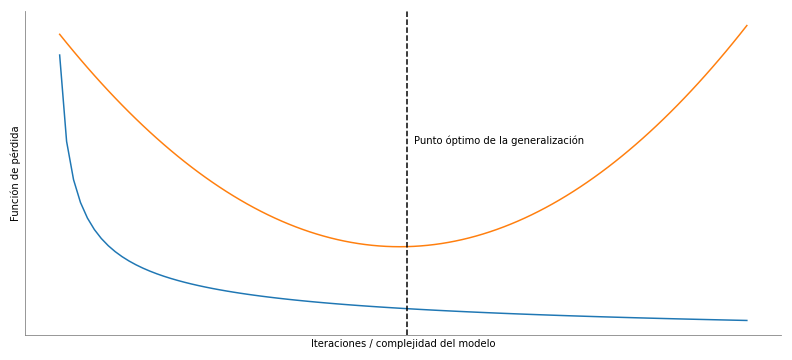

## 0.3.2.2 Función a aproximar usando un modelo de regresión

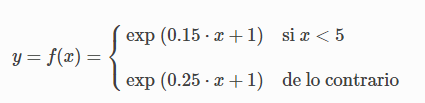

In [4]:
#
# Función a aproximar
# (Proceso geneador de datos)
#
def f(x):
    y = [math.exp(0.15 * u + 1) if u < 5 else math.exp(0.25 * u + 1) for u in x]
    return np.array(y)


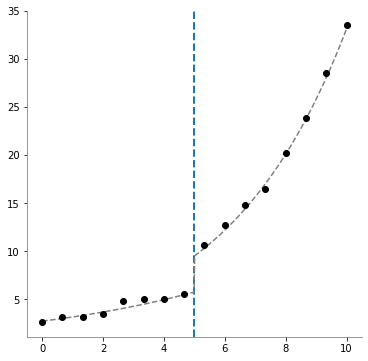

In [5]:
np.random.seed(12345)

x_real = np.linspace(start=0, stop=10, num=500)
x_data = np.linspace(start=0, stop=10, num=16)

d_real = f(x_real)
d_data = f(x_data) + np.random.normal(0, 0.4, len(x_data))

plt.figure(figsize=(6, 6))
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axvline(5, linestyle="--", color="tab:blue", linewidth=2)
plt.plot(x_real, d_real, "--", color="gray")
plt.plot(x_data, d_data, "o", color="black")
plt.show()

## 0.3.2.3 Partición del conjunto de datos

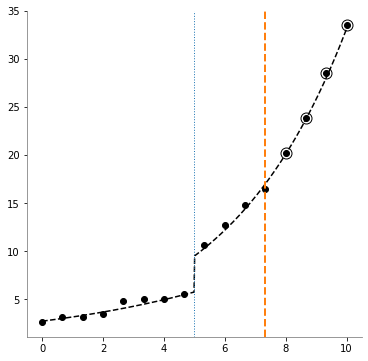

In [6]:
# selecciona los primeros elementos del conjunto de datos
# para calibración y los 4 finales para testing
index = list(range(12))

# muestra usada para estimar los parámetros del modelo
x_fit = x_data[index]
d_fit = d_data[index]

# muestra usada para evaluar la generalización
x_test = np.delete(x_data, index)
d_test = np.delete(d_data, index)

plt.figure(figsize=(6, 6))

plt.plot(x_data, d_data, "o", color="black")
plt.plot(x_real, d_real, "--", color="black")
plt.plot(x_test, d_test, "o", color="black", fillstyle="none", markersize=11)
plt.axvline(5, linestyle=":", color="tab:blue", linewidth=1)
plt.axvline(x_data[11], linestyle="--", color="tab:orange", linewidth=2)
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

## 0.3.2.4 Modelo de regresión

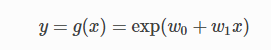

In [7]:
def g(w0, w1, x):
    return [math.exp(w0 + w1 * xi) for xi in x]

## 0.3.2.5 Función de pérdida

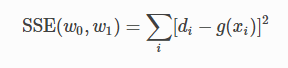

In [8]:
def SSE(w0, w1):

    y_fit = g(w0, w1, x_fit)
    sse_fit = sum([(di - yi) ** 2 for di, yi in zip(d_fit, y_fit)])

    y_test = g(w0, w1, x_test)
    sse_test = sum([(di - yi) ** 2 for di, yi in zip(d_test, y_test)])

    #
    # note que la función devuelve simultaneamente
    # los errores de ajuste y prueba
    #
    return sse_fit, sse_test

## 0.3.2.6 Gradiente de g()

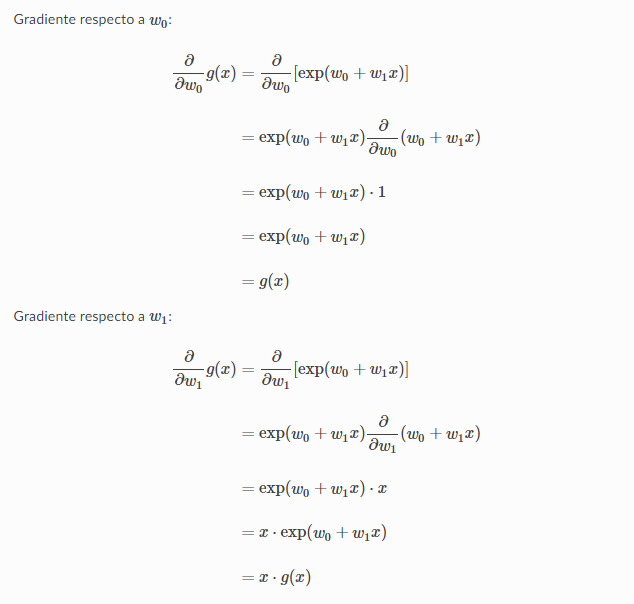

In [9]:
def grd_g(w0, w1):
    grd_w0 = g(w0, w1, x_fit)
    grd_w1 = [gi * xi for gi, xi in zip(grd_w0, x_fit)]
    return grd_w0, grd_w1

## 0.3.2.7 Gradiente de la función de pérdida

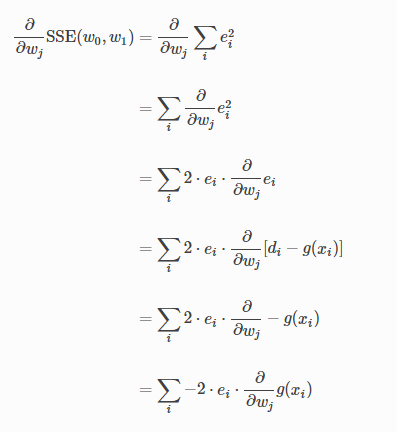

In [10]:
def grd_SSE(w0, w1):

    # calcula el error instantaneo
    y_fit = g(w0, w1, x_fit)
    e_fit = [di - yi for di, yi in zip(d_fit, y_fit)]

    # gradiente de la funcion g()
    grd_gw0, grd_gw1 = grd_g(w0, w1)

    # gradiente de la función SSE()
    grd_SSE_w0 = sum([-2 * ei * gi for ei, gi in zip(e_fit, grd_gw0)])
    grd_SSE_w1 = sum([-2 * ei * gi for ei, gi in zip(e_fit, grd_gw1)])

    return grd_SSE_w0, grd_SSE_w1

## 0.3.2.8 Corrección de los parámetros

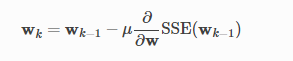

In [11]:
def mejora(w0, w1, mu):
    grd_w0, grd_w1 = grd_SSE(w0, w1)
    w0 = w0 - mu * grd_w0
    w1 = w1 - mu * grd_w1
    return w0, w1

## 0.3.2.9 Proceso iterativo usando gradiente descendente

0.07770616845298246 0.3869431892967564 (25.447857365832416, 530.3035876747726)


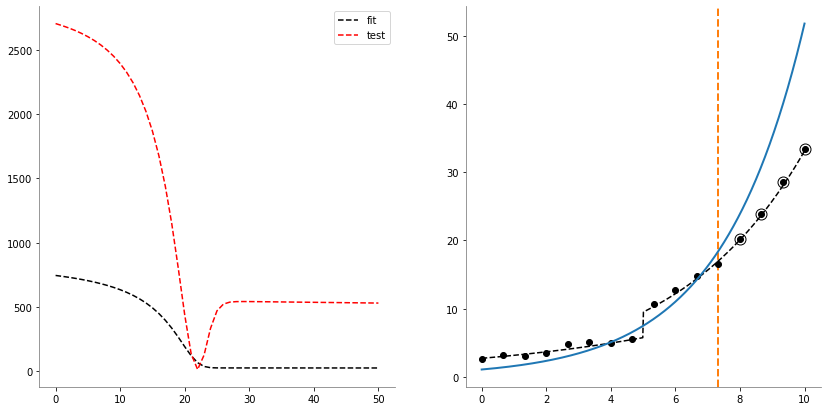

In [12]:
w0, w1 = 0.0, 0.0  # coeficientes iniciales

sse_fit, sse_test = SSE(w0, w1)
history_sse_fit = [sse_fit]
history_sse_test = [sse_test]

for epoch in range(50):
    w0, w1 = mejora(w0, w1, mu=0.00001)
    sse_fit, sse_test = SSE(w0, w1)
    history_sse_fit.append(sse_fit)
    history_sse_test.append(sse_test)

print(w0, w1, SSE(w0, w1))

y_real = g(w0, w1, x_real)


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_sse_fit, "--k", label="fit")
plt.plot(history_sse_test, "--r", label="test")
plt.legend()
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.subplot(1, 2, 2)
plt.axvline(x_data[11], linestyle="--", color="tab:orange", linewidth=2)
plt.plot(x_data, d_data, "o", color="black")
plt.plot(x_real, d_real, "--", color="black")
plt.plot(x_real, y_real, color="tab:blue", linewidth=2)
plt.plot(x_test, d_test, "o", color="black", fillstyle="none", markersize=11)
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

## 0.3.2.10 Early Stopping

0.0642860486727997 0.37000034554740424 (37.25020797644438, 126.18643731436904)


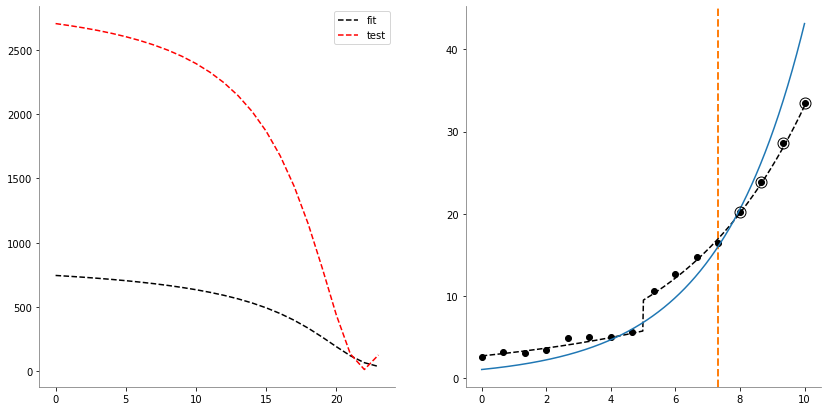

In [13]:
w0, w1 = 0, 0  # coeficientes iniciales

sse_fit, sse_test = SSE(w0, w1)
history_sse_fit = [sse_fit]
history_sse_test = [sse_test]

sse_test_previous = None

for epoch in range(100):
    w0, w1 = mejora(w0, w1, mu=0.00001)
    sse_fit, sse_test = SSE(w0, w1)
    history_sse_fit.append(sse_fit)
    history_sse_test.append(sse_test)
    #
    # Se monitorea sse_test. Si el sse_test
    # aumenta, se detiene la optimización
    #
    if sse_test_previous is None or sse_test_previous > sse_test:
        sse_test_previous = sse_test
    else:
        #
        # aumenta el error de prueba
        #
        break

print(w0, w1, SSE(w0, w1))

y_real = g(w0, w1, x_real)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_sse_fit, "--k", label="fit")
plt.plot(history_sse_test, "--r", label="test")
plt.legend()
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.subplot(1, 2, 2)
plt.axvline(x_data[11], linestyle="--", color="tab:orange", linewidth=2)
plt.plot(x_data, d_data, "o", color="black")
plt.plot(x_real, d_real, "--", color="black")
plt.plot(x_real, y_real, color="tab:blue")
plt.plot(x_test, d_test, "o", color="black", fillstyle="none", markersize=11)
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [14]:
def fig1():

    max_iter = 100
    mu0 = 0.1
    n = 0.5

    learning = [10 * mu0 / (t ** n) for t in range(1, max_iter + 1)]
    test = [0.35 + 0.0003 * (t - 50) ** 2 for t in range(1, max_iter + 1)]

    plt.figure(figsize=(11, 5))

    plt.plot(learning, "-", color="tab:blue", label="Entrenamiento")
    plt.plot(test, "-", color="tab:orange", label="Prueba")
    plt.axvline(50, linestyle="--", color="k")
    plt.text(51, 0.7, "Punto óptimo de la generalización")

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xlabel("Iteraciones / complejidad del modelo")
    plt.ylabel("Función de pérdida")
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    #plt.savefig("assets/generalizacion.png")
    plt.close()


fig1()

In [15]:
print('ok_')

ok_
